In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
input_path = "/content/drive/My Drive/Colab Notebooks (1)/cod/data/all_classes_data.txt"
input_path2 = "/content/drive/My Drive/Colab Notebooks (1)/cod/data/all_classes_data2.txt"
input_path3 = "/content/drive/MyDrive/Colab Notebooks (1)/cod/data/new_data_labels.csv"
stopwords_path = "/content/drive/My Drive/Colab Notebooks (1)/cod/data/stopwords.txt"

In [ ]:
stopwords = pd.read_csv(stopwords_path, header=None, encoding='utf8', names=["label_sentence"])
stopwords = np.array(stopwords)
stopwords = np.ravel(stopwords)
# stopwords

In [ ]:
df = pd.read_csv(input_path, header=None, encoding='utf8', names=["label_sentence"])
df[['label','sentence']] = df["label_sentence"].str.split(" ", 1, expand=True)
df['label'] = df['label'].apply(lambda x: x.split("__")[2])
df['label'] = df['label'].str.lower()
df = df.drop(columns=["label_sentence"])
df['sentence'] = df['sentence'].astype('unicode')

In [ ]:
df2 = pd.read_csv(input_path2, header=None, encoding='utf8', names=["label_sentence"])
df2[['label','sentence']] = df2["label_sentence"].str.split(" ", 1, expand=True)
df2['label'] = df2['label'].apply(lambda x: x.split("__")[2])
df2['label'] = df2['label'].str.lower()
df2 = df2.drop(columns=["label_sentence"])
df2['sentence'] = df2['sentence'].astype('unicode')

In [ ]:
dfnew = pd.read_csv(input_path3, encoding='utf8')
df3 = dfnew[['labels', 'ML transcript']].copy()
df3['labels'] = df3['labels'].apply(str)
df3 = df3.rename(columns={"labels":"label","ML transcript":"sentence"})

In [ ]:
df = df.append(df2).reset_index()

In [ ]:
df3['sentence']

0        इटली एयरपोर्ट कोल्हापुर आयुर्वैदिक मेडिसिन छात...
1        चंदन कुमार ग्राम पोस्ट कुलवा जिला जमुई को नववर...
2        नमस्कार महेश कुमार ग्राम पोस्ट बिलारी थाना दुम...
3        लखनऊ से बिहार मोबाइल वाणिज्य मंत्री से मोबाइल ...
4        नमस्कार मैं मनीषा कुमारी रांची झारखंड के प्रगत...
                               ...                        
14438    गाजीपुर मोबाइल वाणी सुनने की सभी सड़कों को के ...
14439    आप सुन रहे हैं मोबाइल वाले और गांव मुजाहिद गां...
14440    चंदन सिंह राजपूत बरहट प्रखंड अंतर्गत मोबाइल मा...
14441    नमस्कार श्रोताओं मोबाइल पानी में आपका स्वागत ह...
14442    नीलगाय को जान से मारने को ले दो भाइयों को आपस ...
Name: sentence, Length: 14443, dtype: object

In [ ]:
df = df.append(df3).reset_index()

In [ ]:
df = df.drop(columns=['index','level_0'])

In [ ]:
df

,label,sentence
0,local_news,नमस्कार दोस्तों मैं जिला मिर्जापुर के चुनार तह...
1,local_news,नमस्ते दोस्तों गुड मॉर्निंग सभी अच्छे होंगे दो...
2,local_news,जीवन की ओर मंच ग्राम पंचायत सिंदरी पंचम पुरा प...
3,local_news,किसानों की बड़ी चिंता न पत्थर में 10 नंबर गाड़...
4,local_news,मैं भाग्य तुम्हारे हर बार बढ़िया भजन नगर सागर ...
...,...,...
26498,"local_news, governance, health, governance, go...",गाजीपुर मोबाइल वाणी सुनने की सभी सड़कों को के ...
26499,"local_news, governance, health, health,",आप सुन रहे हैं मोबाइल वाले और गांव मुजाहिद गां...
26500,"local_news, governance, governance, culture_&_...",चंदन सिंह राजपूत बरहट प्रखंड अंतर्गत मोबाइल मा...
26501,"local_news, governance, health, governance, he...",नमस्कार श्रोताओं मोबाइल पानी में आपका स्वागत ह...


In [ ]:
df = df.groupby('sentence').agg({'label': ', '.join}).reset_index()
print(df.shape)

(22428, 2)


In [ ]:
df

,sentence,label
0,,"local_news, local_news, local_news, health, he..."
1,$10 कीमत वाली मोबाइल वाली से पूरे बिहार में आज...,"employment, governance, governance,"
2,* * *,"local_news,"
3,* * * * * * * * *,"livelihood, social_issues,"
4,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,culture_&_entertainment
...,...,...
22423,होली होली होली होली बगीचे में घूमने का मजा ही...,culture_&_entertainment
22424,होली होली होली होली रे होली क्यों नहीं आ सकती...,culture_&_entertainment
22425,हौंडा यूनिकॉर्न कोरिया और जल्दी रिकॉर्डिंग भेज...,"culture_&_entertainment,"
22426,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,"culture_&_entertainment,"


In [ ]:
#removing the first row as its only empty string
df = df.iloc[1:]
print(df.shape)

(22427, 2)


In [ ]:
df

,sentence,label
1,$10 कीमत वाली मोबाइल वाली से पूरे बिहार में आज...,"employment, governance, governance,"
2,* * *,"local_news,"
3,* * * * * * * * *,"livelihood, social_issues,"
4,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,culture_&_entertainment
5,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,"infrastructure_services, education,"
...,...,...
22423,होली होली होली होली बगीचे में घूमने का मजा ही...,culture_&_entertainment
22424,होली होली होली होली रे होली क्यों नहीं आ सकती...,culture_&_entertainment
22425,हौंडा यूनिकॉर्न कोरिया और जल्दी रिकॉर्डिंग भेज...,"culture_&_entertainment,"
22426,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,"culture_&_entertainment,"


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
label = list(df['label'])
label = [[j.lower().replace(',', '') for j in i.split()] for i in label]
type(label[0])
# label
multilabel_binarizer.fit(np.array(label))
Y = multilabel_binarizer.transform(label)

In [ ]:
multilabel_binarizer.classes_

array(['', 'agriculture', 'community_groups', 'consumer_issues',
       'culture_&_entertainment', 'education', 'employment',
       'environment', 'governance', 'health', 'industry',
       'infrastructure_services', 'livelihood', 'local_news', 'migration',
       'nan', 'prices_inequality', 'social_issues'], dtype=object)

In [ ]:
#making the dataframe with one hot encoding
for i in range(len(multilabel_binarizer.classes_)):
    col_title = multilabel_binarizer.classes_[i]
    col = Y[:,i]
    df[col_title] = col

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
count = [df[x].sum() for x in multilabel_binarizer.classes_]
count = pd.DataFrame(count, index=multilabel_binarizer.classes_)

In [ ]:
count

,0
,6
agriculture,1854
community_groups,91
consumer_issues,289
culture_&_entertainment,5272
education,3313
employment,1099
environment,820
governance,9654
health,5158


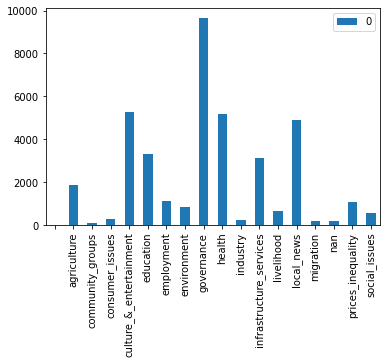

In [ ]:
count.plot.bar()

In [ ]:
df

,sentence,label,,agriculture,community_groups,consumer_issues,culture_&_entertainment,education,employment,environment,governance,health,industry,infrastructure_services,livelihood,local_news,migration,nan,prices_inequality,social_issues
1,$10 कीमत वाली मोबाइल वाली से पूरे बिहार में आज...,"employment, governance, governance,",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,* * *,"local_news,",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,* * * * * * * * *,"livelihood, social_issues,",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,"infrastructure_services, education,",0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22423,होली होली होली होली बगीचे में घूमने का मजा ही...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
22424,होली होली होली होली रे होली क्यों नहीं आ सकती...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
22425,हौंडा यूनिकॉर्न कोरिया और जल्दी रिकॉर्डिंग भेज...,"culture_&_entertainment,",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
22426,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,"culture_&_entertainment,",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks (1)/cod/data/complete_data.csv")

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.


In [ ]:
%cd fastText
!pip3 install .

/content/fastText
Processing /content/fastText
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3030213 sha256=5a456c6e7925b44e64ecc8575c81867c995bddbaaed8542094f06e473d4512d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-vr0d9192/wheels/a1/9f/52/696ce6c5c46325e840c76614ee5051458c0df10306987e7443
Successfully built fasttext


In [ ]:
import fasttext.util
import fasttext

In [ ]:
# load embeddings into memory
path_pre_trained = "/content/drive/My Drive/Colab Notebooks (1)/cod/cc.hi.300.bin"
print("Loading embeddings")
ft = fasttext.load_model(path_pre_trained)

Loading embeddings


In [ ]:
ft.get_nearest_neighbors(b'\xe0\xa4\x95\xe0\xa4\xb0\xe0\xa4\xa8\xe0\xa5\x87')

[(0.7406541705131531, 'लिए'),
 (0.7016867995262146, 'कराने'),
 (0.6950420141220093, 'करना'),
 (0.6947993040084839, 'होने'),
 (0.6805431246757507, 'करके'),
 (0.6702057123184204, 'करवाने'),
 (0.6648045182228088, 'देने'),
 (0.6638022065162659, 'करनेे'),
 (0.6585147976875305, 'करते'),
 (0.6459359526634216, 'करता')]

In [ ]:
b'\xe0\xa4\x95\xe0\xa4\xb0\xe0\xa4\xa8\xe0\xa5\x87'.decode()

'करने'

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def sentence_to_vec(s, embedding_dict, stop_words, tokenizer):
    """
    Given a sentence and other information,
    this function returns embedding for the whole sentence
    :param s: sentence, string
    :param embedding_dict: dictionary word:vector
    :param stop_words: list of stop words, if any
    :param tokenizer: a tokenization function
    """
    # # convert sentence to string and lowercase it
    # words = str(s).lower()
    
    # tokenize the sentence
    words = tokenizer(s)
    
    # remove stop word tokens
    words = [w for w in words if not w in stop_words]
    
    # keep only alpha-numeric tokens
    # words = [w for w in words if w.isalpha()]
    
    # initialize empty list to store embeddings
    M = []
    for w in words:
    # for evert word, fetch the embedding from
    # the dictionary and append to list of
    # embeddings
        emb = ft.get_word_vector(w.encode('utf8'))
        M.append(emb)
            
    # if we dont have any vectors, return zeros
    if len(M) == 0:
        return np.zeros(300)
    
    # convert list of embeddings to array
    M = np.array(M)
    
    # calculate sum over axis=0
    v = M.sum(axis=0)
    
    # return normalized vector
    return v / np.sqrt((v ** 2).sum())




# create sentence embeddings
def create_embeddings(sentences):
    print("Creating sentence vectors")
    vectors = []
    for review in sentences:
        vectors.append(
            sentence_to_vec(
                s = review,
                embedding_dict = ft,
                stop_words = stopwords,
                tokenizer = word_tokenize
            )
        )
    return vectors




def train_fasttext_SVM(df, cls, k=5):


    kf = KFold(n_splits=k)
    kf.get_n_splits(df)

    X = np.array(create_embeddings(df['sentence']))
    print(X.shape)

    acc = []
    i = 0

    YPred = np.array([])
    YTest = np.array([])

    row = []

    for train_index, test_index in kf.split(df):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = df[cls][train_index], df[cls][test_index]

        xtrain = X_train
        xtest = X_test

        # print(type(xtrain))
        # print(xtrain)

        # initialize logistic regression model
        model = SVC(C=10,kernel='rbf')

        #scaling
        scaler = StandardScaler()
        scaler.fit(xtrain)
        xtrainT = scaler.transform(xtrain)
        xtestT = scaler.transform(xtest)

        model.fit(xtrainT, y_train)

        # make predictions on test data
        # threshold for predictions is 0.5
        preds = model.predict(xtestT)
        # calculate accuracy
        accuracy = metrics.accuracy_score(y_test, preds)
        acc.append(accuracy)

        # print(type(y_test), type(preds), preds.shape)
        # print(y_test.to_numpy().shape)

        YTest = np.concatenate([YTest,y_test.to_numpy()])
        YPred = np.concatenate([YPred,preds])

        # print(f"Fold: {i}")
        # print(f"Accuracy = {accuracy}")
        i+=1

        # print(xtest)
        # print(count_vec)
        # break

    # print(type(YTest))
    # print(YTest.shape)
    # print("Accuracy for {}: {}".format(cls, sum(acc)/len(acc)))
    print("Class: {}".format(cls))
    print("Accuracy score: {}".format(accuracy_score(YTest,YPred)))
    print("Precision score: {}".format(precision_score(YTest,YPred)))
    print("Recall score: {}".format(recall_score(YTest,YPred)))
    print("F1 score: {}".format(f1_score(YTest,YPred)))
    print("Confusion Matrix: {}".format(confusion_matrix(YTest,YPred)))
    print("")

    row.append(accuracy_score(YTest,YPred))
    row.append(confusion_matrix(YTest,YPred))
    row.append(precision_score(YTest,YPred))
    row.append(recall_score(YTest,YPred))
    row.append(f1_score(YTest,YPred))
    
    return row


def train_all_classes(df,classes):

    rows = []

    for cls in classes:
        df_s = df[['sentence','label',cls]]
        df_s1 = df_s[df_s[cls]==1]

        df_s0 = df_s[df_s[cls]==0]
        df_s0 = df_s0.sample(frac=1)
        df_s0 = df_s0.iloc[:len(df_s1)]

        df_sData = df_s1.append(df_s0)
        df_sData = df_sData.reset_index()

        r = train_fasttext_SVM(df_sData,cls)
        rows.append(r)
    
    newdf = pd.DataFrame(rows)
    return newdf

In [ ]:
newdf = train_all_classes(df,multilabel_binarizer.classes_)

Creating sentence vectors
(12, 300)
Class: 
Accuracy score: 0.25
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Confusion Matrix: [[3 3]
 [6 0]]

Creating sentence vectors
(3708, 300)
Class: agriculture
Accuracy score: 0.7702265372168284
Precision score: 0.8
Recall score: 0.7206040992448759
F1 score: 0.7582292849035187
Confusion Matrix: [[1520  334]
 [ 518 1336]]

Creating sentence vectors
(182, 300)
Class: community_groups
Accuracy score: 0.5274725274725275
Precision score: 0.5287356321839081
Recall score: 0.5054945054945055
F1 score: 0.5168539325842697
Confusion Matrix: [[50 41]
 [45 46]]

Creating sentence vectors
(578, 300)
Class: consumer_issues
Accuracy score: 0.7629757785467128
Precision score: 0.7695035460992907
Recall score: 0.7508650519031141
F1 score: 0.7600700525394045
Confusion Matrix: [[224  65]
 [ 72 217]]

Creating sentence vectors
(10544, 300)
Class: culture_&_entertainment
Accuracy score: 0.7334028831562974
Precision score: 0.7460507898420315
Recall score: 0.707

In [ ]:
print(newdf)

           0                             1         2         3         4
0   0.772404      [[575, 128], [192, 511]]  0.799687  0.726885  0.761550
1   0.556604          [[31, 22], [25, 28]]  0.560000  0.528302  0.543689
2   0.688406         [[101, 37], [49, 89]]  0.706349  0.644928  0.674242
3   0.771014    [[1926, 489], [617, 1798]]  0.786183  0.744513  0.764781
4   0.681643      [[749, 286], [373, 662]]  0.698312  0.639614  0.667675
5   0.710526       [[313, 86], [145, 254]]  0.747059  0.636591  0.687415
6   0.649091       [[182, 93], [100, 175]]  0.652985  0.636364  0.644567
7   0.586802  [[1634, 1033], [1171, 1496]]  0.591538  0.560930  0.575828
8   0.650052    [[1330, 606], [749, 1187]]  0.662019  0.613120  0.636632
9   0.767956        [[147, 34], [50, 131]]  0.793939  0.723757  0.757225
10  0.707965      [[654, 250], [278, 626]]  0.714612  0.692478  0.703371
11  0.523622          [[75, 52], [69, 58]]  0.527273  0.456693  0.489451
12  0.589074      [[257, 164], [182, 239]]  0.59305

In [ ]:
print(newdf)

           0                             1         2         3         4
0   0.250000              [[3, 3], [6, 0]]  0.000000  0.000000  0.000000
1   0.770227    [[1520, 334], [518, 1336]]  0.800000  0.720604  0.758229
2   0.527473          [[50, 41], [45, 46]]  0.528736  0.505495  0.516854
3   0.762976        [[224, 65], [72, 217]]  0.769504  0.750865  0.760070
4   0.733403  [[4002, 1270], [1541, 3731]]  0.746051  0.707701  0.726370
5   0.699668   [[2449, 864], [1126, 2187]]  0.716814  0.660127  0.687304
6   0.718835      [[847, 252], [366, 733]]  0.744162  0.666970  0.703455
7   0.704268      [[609, 211], [274, 546]]  0.721268  0.665854  0.692454
8   0.580951  [[5918, 3736], [4355, 5299]]  0.586497  0.548892  0.567072
9   0.621656  [[3424, 1734], [2169, 2989]]  0.632860  0.579488  0.604999
10  0.678279        [[177, 67], [90, 154]]  0.696833  0.631148  0.662366
11  0.689507   [[2279, 866], [1087, 2058]]  0.703830  0.654372  0.678201
12  0.627219      [[459, 217], [287, 389]]  0.64191

In [ ]:
newdf['labels'] = multilabel_binarizer.classes_
newdf = newdf.set_index('labels')
newdf

,0,1,2,3,4
labels,,,,,
,0.250000,"[[3, 3], [6, 0]]",0.000000,0.000000,0.000000
agriculture,0.770227,"[[1520, 334], [518, 1336]]",0.800000,0.720604,0.758229
community_groups,0.527473,"[[50, 41], [45, 46]]",0.528736,0.505495,0.516854
consumer_issues,0.762976,"[[224, 65], [72, 217]]",0.769504,0.750865,0.760070
culture_&_entertainment,0.733403,"[[4002, 1270], [1541, 3731]]",0.746051,0.707701,0.726370
education,0.699668,"[[2449, 864], [1126, 2187]]",0.716814,0.660127,0.687304
employment,0.718835,"[[847, 252], [366, 733]]",0.744162,0.666970,0.703455
environment,0.704268,"[[609, 211], [274, 546]]",0.721268,0.665854,0.692454
governance,0.580951,"[[5918, 3736], [4355, 5299]]",0.586497,0.548892,0.567072


In [ ]:
newdf.to_csv("/content/drive/MyDrive/Colab Notebooks (1)/cod/data/fasttext_res.csv")

In [ ]:
vocb = set([])

def set_vocab(sentences):
	vocb.clear()
	sentences = list(sentences)
	for line in sentences: 
    	# print(line)
		word_arr = line.split(' ')
		for word in word_arr:
			vocb.add(word.encode('utf8'))
			# print(word.encode('utf8'))
			# break
		# break


def count_fit(sentences):
	set_vocab(sentences)

def count_transform(sentences):
	dict_vocab = {}
	for i,val in enumerate(vocb):
		dict_vocab[val] = i
	sentences = list(sentences)
	
	rows = []

	for line in sentences:
		row_tmp = [0]*len(vocb)
		for word in line:
			try:
				row_tmp[dict_vocab[word]] = row_tmp[dict_vocab[word]]+1
			except:
				continue

		rows.append(row_tmp)

	return rows

In [ ]:
set_vocab(df['sentence'])
# vocb

In [ ]:
len(vocb)

35190

In [ ]:
def train_count_tfidf_SVM(df,cls,k=5):
    kf = KFold(n_splits=k)
    kf.get_n_splits(df)

    i = 0
    acc = []
    YPred = np.array([])
    YTest = np.array([])

    row = []

    for train_index, test_index in kf.split(df):

        X_train, X_test = df['sentence'][train_index], df['sentence'][test_index]
        y_train, y_test = df[cls][train_index], df[cls][test_index]

        count_vec = CountVectorizer(
            tokenizer=word_tokenize,
            token_pattern=None,
            stop_words = frozenset(stopwords),
        )
        count_vec.fit(X_train)

        # transform training and validation data reviews
        xtrain = count_vec.transform(X_train)
        xtest = count_vec.transform(X_test)

        # count_fit(X_train)
        # xtrain = count_transform(X_train)
        # xtest = count_transform(X_test)

        # print(type(xtrain),xtrain.shape)
        tfidf_vec = TfidfTransformer(
            use_idf=False,
            # stop_words=stopwords,
        )
        tfidf_vec.fit(xtrain)

        # transform training and validation data reviews
        xtrain = tfidf_vec.transform(xtrain)
        xtest = tfidf_vec.transform(xtest)

        # initialize logistic regression model
        model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

        #scaling
        scaler = StandardScaler(with_mean=False)
        scaler.fit(xtrain)
        # xtrainT = scaler.transform(xtrain)
        # xtestT = scaler.transform(xtest)


        model.fit(xtrain, y_train)

        # make predictions on test data
        # threshold for predictions is 0.5
        preds = model.predict(xtest)
        # calculate accuracy
        accuracy = metrics.accuracy_score(y_test, preds)
        acc.append(accuracy)

        # print(f"Fold: {i}")
        # print(f"Accuracy = {accuracy}")
        # print("")
        # i+=1

        YTest = np.concatenate([YTest,y_test.to_numpy()])
        YPred = np.concatenate([YPred,preds])

        # print(xtest)
        # print(count_vec)
        # break

    print("Class: {}".format(cls))
    print("Accuracy score: {}".format(accuracy_score(YTest,YPred)))
    print("Precision score: {}".format(precision_score(YTest,YPred)))
    print("Recall score: {}".format(recall_score(YTest,YPred)))
    print("F1 score: {}".format(f1_score(YTest,YPred)))
    print("Confusion Matrix: {}".format(confusion_matrix(YTest,YPred)))
    print("")

    row.append(accuracy_score(YTest,YPred))
    row.append(confusion_matrix(YTest,YPred))
    row.append(precision_score(YTest,YPred))
    row.append(recall_score(YTest,YPred))
    row.append(f1_score(YTest,YPred))
    
    return row    


def train_all_classes_SVM(df,classes):

    rows = []

    for cls in classes:
        df_s = df[['sentence','label',cls]]
        df_s1 = df_s[df_s[cls]==1]

        df_s0 = df_s[df_s[cls]==0]
        df_s0 = df_s0.sample(frac=1)
        df_s0 = df_s0.iloc[:len(df_s1)]

        df_sData = df_s1.append(df_s0)
        df_sData = df_sData.reset_index()

        r = train_count_tfidf_SVM(df_sData,cls)
        rows.append(r)
    
    newdf = pd.DataFrame(rows)
    return newdf

In [ ]:
newdf2 = train_all_classes_SVM(df,multilabel_binarizer.classes_)

Class: 
Accuracy score: 0.16666666666666666
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Confusion Matrix: [[2 4]
 [6 0]]

Class: agriculture
Accuracy score: 0.7583603020496225
Precision score: 0.8090322580645162
Recall score: 0.6763754045307443
F1 score: 0.736780258519389
Confusion Matrix: [[1558  296]
 [ 600 1254]]

Class: community_groups
Accuracy score: 0.33516483516483514
Precision score: 0.3333333333333333
Recall score: 0.32967032967032966
F1 score: 0.3314917127071823
Confusion Matrix: [[31 60]
 [61 30]]

Class: consumer_issues
Accuracy score: 0.671280276816609
Precision score: 0.7053941908713693
Recall score: 0.5882352941176471
F1 score: 0.6415094339622641
Confusion Matrix: [[218  71]
 [119 170]]

Class: culture_&_entertainment
Accuracy score: 0.7091236722306525
Precision score: 0.731763716628127
Recall score: 0.6602807283763278
F1 score: 0.6941868581114766
Confusion Matrix: [[3996 1276]
 [1791 3481]]

Class: education
Accuracy score: 0.7173256866888017
Precision score: 

In [ ]:
newdf2['labels'] = multilabel_binarizer.classes_
newdf2 = newdf2.set_index('labels')
newdf2

,0,1,2,3,4
labels,,,,,
,0.000000,"[[0, 6], [6, 0]]",0.000000,0.000000,0.000000
agriculture,0.766990,"[[1570, 284], [580, 1274]]",0.817715,0.687163,0.746776
community_groups,0.401099,"[[35, 56], [53, 38]]",0.404255,0.417582,0.410811
consumer_issues,0.641869,"[[206, 83], [124, 165]]",0.665323,0.570934,0.614525
culture_&_entertainment,0.701442,"[[3948, 1324], [1824, 3448]]",0.722548,0.654021,0.686579
education,0.714760,"[[2635, 678], [1212, 2101]]",0.756027,0.634168,0.689757
employment,0.718835,"[[877, 222], [396, 703]]",0.760000,0.639672,0.694664
environment,0.628049,"[[581, 239], [371, 449]]",0.652616,0.547561,0.595491
governance,0.546561,"[[5618, 4036], [4719, 4935]]",0.550106,0.511187,0.529933


In [ ]:
newdf2

NameError: ignored

In [ ]:
def train_countVectorizer_SVM(df, k=5):

    kf = KFold(n_splits=k)
    kf.get_n_splits(df)

    i = 0
    acc = []
    for train_index, test_index in kf.split(df):

        X_train, X_test = df['sentence'][train_index], df['sentence'][test_index]
        y_train, y_test = df[cls][train_index], df[cls][test_index]

        count_vec = CountVectorizer(
            tokenizer=word_tokenize,
            token_pattern=None
        )
        count_vec.fit(X_train)

        # transform training and validation data reviews
        xtrain = count_vec.transform(X_train)
        xtest = count_vec.transform(X_test)

        # initialize logistic regression model
        model = SVC(C=20, kernel='rbf')

        #scaling
        scaler = StandardScaler(with_mean=False)
        scaler.fit(xtrain)
        # xtrainT = scaler.transform(xtrain)
        # xtestT = scaler.transform(xtest)


        model.fit(xtrain, y_train)

        # make predictions on test data
        # threshold for predictions is 0.5
        preds = model.predict(xtest)
        # calculate accuracy
        accuracy = metrics.accuracy_score(y_test, preds)
        acc.append(accuracy)

        print(f"Fold: {i}")
        print(f"Accuracy = {accuracy}")
        print("")
        i+=1

        # print(xtest)
        # print(count_vec)
        # break
    
    print(sum(acc)/len(acc))

In [ ]:
train_countVectorizer_SVM(df_sData)

NameError: ignored

In [ ]:
def train_tfidfVectorizer_SVM(df, k=5):

    kf = KFold(n_splits=k)
    kf.get_n_splits(df)

    acc = []
    i = 0
    for train_index, test_index in kf.split(df):

        X_train, X_test = df['sentence'][train_index], df['sentence'][test_index]
        y_train, y_test = df[cls][train_index], df[cls][test_index]

        tfidf_vec = TfidfVectorizer(
            tokenizer=word_tokenize,
            token_pattern=None,
            # stop_words=stopwords,
        )
        tfidf_vec.fit(X_train)

        # transform training and validation data reviews
        xtrain = tfidf_vec.transform(X_train)
        xtest = tfidf_vec.transform(X_test)

        # initialize logistic regression model
        model = SVC(C=100, kernel='rbf')

        #scaling
        scaler = StandardScaler(with_mean=False)
        scaler.fit(xtrain)
        # xtrainT = scaler.transform(xtrain)
        # xtestT = scaler.transform(xtest)

        model.fit(xtrain, y_train)

        # make predictions on test data
        # threshold for predictions is 0.5
        preds = model.predict(xtest)
        # calculate accuracy
        accuracy = metrics.accuracy_score(y_test, preds)
        acc.append(accuracy)

        print(f"Fold: {i}")
        print(f"Accuracy = {accuracy}")
        print("")
        i+=1

        # print(xtest)
        # print(count_vec)
        # break
    print(sum(acc)/len(acc))

In [ ]:
train_tfidfVectorizer_SVM(df_sData)

In [ ]:
from sklearn import naive_bayes

In [ ]:
def train_tfidfVectorizer_NB(df, k=5):

    kf = KFold(n_splits=k)
    kf.get_n_splits(df)

    acc = []
    i = 0
    for train_index, test_index in kf.split(df):

        X_train, X_test = df['sentence'][train_index], df['sentence'][test_index]
        y_train, y_test = df[cls][train_index], df[cls][test_index]

        tfidf_vec = TfidfVectorizer(
            tokenizer=word_tokenize,
            token_pattern=None,
            # stop_words=stopwords,
        )
        tfidf_vec.fit(X_train)

        # transform training and validation data reviews
        xtrain = tfidf_vec.transform(X_train)
        xtest = tfidf_vec.transform(X_test)

        # initialize logistic regression model
        model = naive_bayes.MultinomialNB()

        #scaling
        scaler = StandardScaler(with_mean=False)
        scaler.fit(xtrain)
        # xtrainT = scaler.transform(xtrain)
        # xtestT = scaler.transform(xtest)

        model.fit(xtrain, y_train)

        # make predictions on test data
        # threshold for predictions is 0.5
        preds = model.predict(xtest)
        # calculate accuracy
        accuracy = metrics.accuracy_score(y_test, preds)
        acc.append(accuracy)

        print(f"Fold: {i}")
        print(f"Accuracy = {accuracy}")
        print("")
        i+=1

        # print(xtest)
        # print(count_vec)
        # break
    print(sum(acc)/len(acc))

In [ ]:
train_tfidfVectorizer_NB(df_sData)

Fold: 0
Accuracy = 0.2232258064516129

Fold: 1
Accuracy = 0.18580645161290324

Fold: 2
Accuracy = 0.7493540051679587

Fold: 3
Accuracy = 0.05426356589147287

Fold: 4
Accuracy = 0.06330749354005168

0.2551914645327999


In [ ]:
def sentence_to_vec(s, embedding_dict, stop_words, tokenizer, idf_dict):
    """
    Given a sentence and other information,
    this function returns embedding for the whole sentence
    :param s: sentence, string
    :param embedding_dict: dictionary word:vector
    :param stop_words: list of stop words, if any
    :param tokenizer: a tokenization function
    """

    # # convert sentence to string and lowercase it
    # words = str(s).lower()
    
    # tokenize the sentence
    words = tokenizer(s)
    
    # remove stop word tokens
    words = [w for w in words if not w in stop_words]
    
    # keep only alpha-numeric tokens
    # words = [w for w in words if w.isalpha()]
    
    # initialize empty list to store embeddings
    M = []
    for w in words:
    # for evert word, fetch the embedding from
    # the dictionary and append to list of
    # embeddings
        emb = ft.get_word_vector(w)
        M.append(emb)
            
    # if we dont have any vectors, return zeros
    if len(M) == 0:
        return np.zeros(300)
    
    # convert list of embeddings to array
    M = np.array(M)
    
    # calculate sum over axis=0
    v = M.sum(axis=0)
    
    # return normalized vector
    return v / np.sqrt((v ** 2).sum())

In [ ]:
train_fasttext_SVM(df_sData,5)

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def train_fasttext_RF(df, k=5):

    kf = KFold(n_splits=k)
    kf.get_n_splits(df)

    X = np.array(create_embeddings(df['sentence']))
    print(X.shape)

    acc = []
    i = 0
    for train_index, test_index in kf.split(df):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = df[cls][train_index], df[cls][test_index]

        xtrain = X_train
        xtest = X_test

        # print(type(xtrain))
        print(xtrain.shape)

        # initialize logistic regression model
        model = RandomForestClassifier(min_samples_split=100, max_depth=10)

        #scaling
        scaler = StandardScaler()
        scaler.fit(xtrain)
        xtrainT = scaler.transform(xtrain)
        xtestT = scaler.transform(xtest)

        model.fit(xtrainT, y_train)

        # make predictions on test data
        # threshold for predictions is 0.5
        preds = model.predict(xtestT)
        # calculate accuracy
        accuracy = metrics.accuracy_score(y_test, preds)
        acc.append(accuracy)

        print(f"Fold: {i}")
        print(f"Accuracy = {accuracy}")
        print("Train Accuracy: {}".format(metrics.accuracy_score(y_train,model.predict(xtrainT))))
        print("")
        i+=1

        # print(xtest)
        # print(count_vec)
        # break
    print(sum(acc)/len(acc))

In [ ]:
train_fasttext_RF(df_sData)

Creating sentence vectors
(3872, 300)
(3097, 300)
Fold: 0
Accuracy = 0.3251612903225806
Train Accuracy: 0.8214401033257992

(3097, 300)
Fold: 1
Accuracy = 0.23870967741935484
Train Accuracy: 0.8098159509202454

(3098, 300)


KeyboardInterrupt: ignored

In [ ]:
def fit(docs):  # comply with scikit-learn transformer requirement
    """
    Fit in a list of docs, which had been preprocessed and tokenized,
    such as word bi-grammed, stop-words removed, lemmatized, part of speech filtered.
    Then build up a tfidf model to compute each word's idf as its weight.
    Noted that tf weight is already involved when constructing average word vectors, and thus omitted.
    :param
        pre_processed_docs: list of docs, which are tokenized
    :return:
        self
    """

    text_docs = []
    for doc in docs:
        text_docs.append(" ".join(doc))

    tfidf = TfidfVectorizer()
    tfidf.fit(text_docs)  # must be list of text string

    # if a word was never seen - it must be at least as infrequent
    # as any of the known words - so the default idf is the max of
    # known idf's
    max_idf = max(tfidf.idf_)  # used as default value for defaultdict
    word_idf_weight = defaultdict(lambda: max_idf,
                        [(word, tfidf.idf_[i]) for word, i in tfidf.vocabulary_.items()])
    return word_idf_weight